<!DOCTYPE html>
<html>
<head>
<title>Jenis Font</title>
</head>
<body>

<br/> 
<div style="border-style:solid;">
<div style=>
<div style="border-bottom: solid">
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">KEMENTRIAN RISET TEKNOLOGI DAN PENDIDIKAN TINGGI</font></h1>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">PROGRAM STUDI GEOFISIKA JURUSAN FISIKA</font></h1>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM</font></h1>
<b><font face="Times New Roman"><font size="2"><h1 style="text-align:center;">UNIVERSITAS GADJAH MADA</font></h1>
    
<br/></div><div style="border-bottom: solid">
 

<br/>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">LAPORAN PRAKTIKUM METODE ANALISIS GEOFISIKA</font></h1>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">ACARA 6. SISTEM LTI - KONVOLUSI </font></h1>

    
    
    
&emsp;
    &emsp;
<img src="https://luk.staff.ugm.ac.id/logo/UGM/Resmi/Hitam-putih.gif" width="280" height="280" align="justify" />
&emsp;
    &emsp;
    
<br/>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">DISUSUN OLEH:</font></h1>
<b><font face="Times New Roman"><font size="0.8"><h1 style="text-align:center;">ZAIDHANIA NABILA</font></h1>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">20/459240/PA/19901</font></h1>
<br/>
<br/>
<br/>
<br/>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">ASISTEN ACARA:</font></h1>    <b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">TIM ASISTEN PRAKTIKUM METODE ANALISIS GEOFISIKA</font></h1>
<br/>
<br/>
</div><div style="border-bottom: solid">
<br>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">YOGYAKARTA</font></h1>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">NOVEMBER</font></h1>
<b><font face="Times New Roman"><font size="1"><h1 style="text-align:center;">2021</font></h1>
    <br>
    
</body>
</html>
</div>

## Soal NIM GENAP
1. Carilah Impulse response dari Filter Tapis tinggi (high-pass filter),
terapkan filter metode konvolusi dengan menggunakan impulse
response tersebut dan tulis kode programnya
2. Terapkan Filter tersebut terhadap data sintetik (sweep) dan data
real

## High Pass Filter Data Sweep

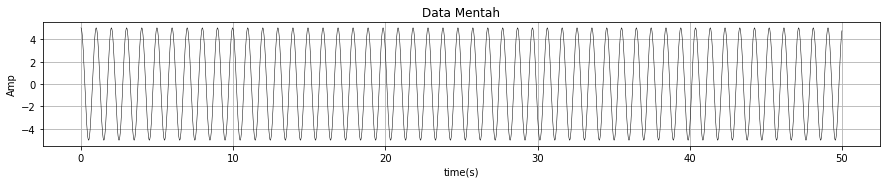

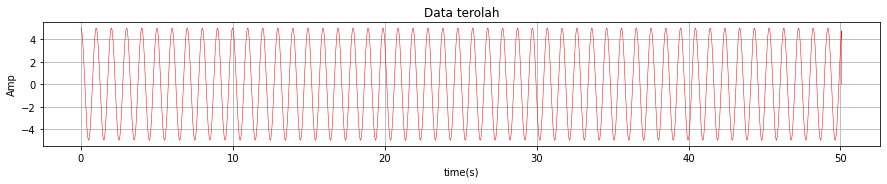

In [20]:
import numpy as np #memanggil modul numpy
import matplotlib.pyplot as plt #memanggil modul matplotlib 

#pendefinisian sinyal sweep
def sweep(A,f_initial,f_final,time):
    cons   = (f_final-f_initial)/len(time)
    f_new  = f_initial + cons*time
    signal = A*np.cos(2*np.pi*f_new*time) 
    return signal

time = np.arange(0,50,0.001) #rentang waktu sinyal
A         = 5 #nilai amplitudo
f_initial = 1 #nilai f awal atau initial
f_final   = 20  #nilai f akhir atau final
signal_sweep = sweep(A,f_initial,f_final,time) #memanggil sinyal sweep

dt= 0.001 #jarak anatar data dibuat kecil agar grafik halus 
x=signal_sweep

R=5 #mendefinisikan nilai resistor (dibuat 5)
C=0.5 #mendefinisikan nilai kapasitor (dibuat 0.5)
T=dt #mendefinisikan nilai periode/interval sampling

#koefisien filter
a0_hg = R*C/T+1
a1_hg = -R*C/T
b0_hg = R*C/T
b1_hg = -R*C/T

#mencari nilai h[n] atau impulse respon High pass filter
n = 10 #jumlah masukan n pada impulse respons
h_hg=np.zeros(n)#membuat nilai di dalam array h menjadi 0
h_hg[0]=b0_hg/a0_hg #h_hg ketika n = 0

for i in range (1,n):
    h_hg[i]= (-1)**(i-1)*(a1_hg**(i-1)/a0_hg**(i))*(b1_hg-(a1_hg*b0_hg)/a0_hg) #rumus impuls respons HPF
    

#konvolusi masukan dengan impulse respons HPF
N_hg= x.size #jumlah data dalam array x
M_hg= h_hg.size #jumlah data dalam array h
y_hg= np.zeros(N_hg+M_hg-1) #membuat array y_hg bernilai 0

#mengatur template
for i in range(0,N_hg+M_hg-1):
    i1 = i;
    tmp= 0.0;
    for j in range (0,M_hg-1):
        if (i1>=0 and i1 <N_hg):
            tmp=tmp+ x[i1]*h_hg[j];
        i1= i1 - 1
        y_hg[i]=tmp

#Rentang waktu pencuplikan data hasil filter
dty= 50.1/(N_hg+M_hg-1)
ty= np.arange(0.0, 50.1,dty)

#plot grafik
plt.figure(figsize=(15,5)) #ukuran grafik
plt.subplot(2,1,1) #mengatur besar baris(2), kolom(1), dan indeks grafis (1)
plt.plot(time,x,'k-',linewidth='0.5') #mengatur plot pada grafik, dengan warna hitam
plt.title('Data Mentah') #memberikan judul grafik
plt.xlabel('time(s)') #plot sumbu x
plt.ylabel('Amp') #plot sumbu y
plt.grid() #memberikan grid

plt.figure(figsize=(15,5)) #ukuran grafik
plt.subplot(2,1,1) #mengatur besar baris(2), kolom(1), dan indeks grafis (1)
plt.plot(ty,y_hg,'r-',linewidth='0.5') #mengatur plot pada grafik, dengan warna merah
plt.title('Data terolah') #memberikan judul grafik
plt.xlabel('time(s)') #plot sumbu x
plt.ylabel('Amp') #plot sumbu y
plt.grid()  #memberikan grid
plt.show() #menampilkan grafik

## High Pass Filter Data Real

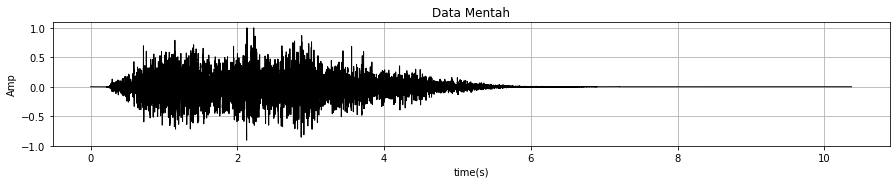

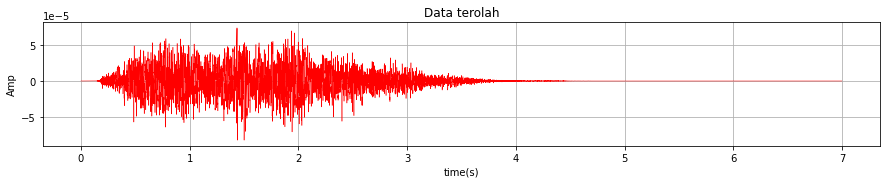

In [22]:
import numpy as np #mengimport modul 
import matplotlib.pyplot as plt#mengimport modul 
import soundfile as sf#mengimport modul 

x,fs=sf.read('roarobo.wav') #import dari file device
x  = np.array([i[0]for i in x]) #pendefinisian c 
t=np.arange(len(x))/fs #panjang waktu gelombang
dt=1/fs

#koefisien filter
R=5 #mendefinisikan nilai resistor (dibuat 5)
C=0.5 #mendefinisikan nilai kapasitor (dibuat 0.5)
T=dt #mendefinisikan nilai periode/interval sampling

#konstanta dari LCCDE High pass filter
a0_hg = R*C/T+1
a1_hg = -R*C/T
b0_hg = R*C/T
b1_hg = -R*C/T

#mencari nolai h[n] impulse respon High pass filter
n = 10 #jumlah masukan n pada impulse respons
h_hg=np.zeros(n)#membuat nilai di dalam array h menjadi 0
h_hg[0]=b0_hg/a0_hg #h_hg ketika n = 0
for i in range (0,n):
    h_hg[i]= (-1)**(i-1)*(a1_hg**(i-1)/a0_hg**(i))*(b1_hg-(a1_hg*b0_hg)/a0_hg) #rumus impuls respons HPF
    

#konvolusi masukan dengan impulse respons HPF
N_hg= x.size #jumlah data dalam array x
M_hg= h_hg.size #jumlah data dalam array h
y_hg= np.zeros(N_hg+M_hg-1) #membuat array y_hg bernilai 0

#mengatur template
for i in range(0,N_hg+M_hg-1):
    i1 = i;
    tmp= 0.0;
    for j in range (0,M_hg-1):
        if (i1>=0 and i1 <N_hg):
            tmp=tmp+ x[i1]*h_hg[j];
        i1= i1 - 1
        y_hg[i]=tmp

#Rentang waktu pencuplikan data hasil filter
dty= 7/(N_hg+M_hg-1)
ty= np.arange(0.0, 7,dty)

#plot grafik
plt.figure(figsize=(15,5)) #ukuran grafik
plt.subplot(2,1,1) #mengatur besar baris(2), kolom(1), dan indeks grafis (1)
plt.plot(t,x,'-k',linewidth='1') #mengatur plot pada grafik, dengan warna merah dan jarak dengan grafik sebanyak 1
plt.title('Data Mentah')  #memberikan judul grafik
plt.xlabel('time(s)') #plot sumbu x
plt.ylabel('Amp') #plot sumbu y
plt.grid() #memberikan grid

plt.figure(figsize=(15,5)) #ukuran grafik
plt.subplot(2,1,2) #mengatur besar baris(2), kolom(1), dan indeks grafis (1)
plt.plot(ty,y_hg,'-r',linewidth='0.5') #mengatur plot pada grafik, dengan warna merah
plt.title('Data terolah') #memberikan judul grafik
plt.xlabel('time(s)')  #plot sumbu x
plt.ylabel('Amp')  #plot sumbu y
plt.grid() #memberikan grid
plt.show() #menampilkan grafik